In [1]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




In [2]:
casted_MAF_VarBySample4 <- read.csv("./7669_RevisionD-T.csv", header=T, sep="," ,row.names=1)

In [3]:
temp2<-data.frame()
temp3<-data.frame(0:1000)
for (j in c('EC','F','I','O','P','T')){
    for (k in seq(0, 1, length.out = 1000+1)){
    temp2<-rbind(temp2,sqrt(sum((subset(casted_MAF_VarBySample4, Hemisphere %in% c('L') & Region %in% c(j) & Cell_Type %in% c("D-T"))[,-1:-4] -
                    subset(casted_MAF_VarBySample4, Hemisphere %in% c('L') & Region %in% c(j) & Cell_Type=="COUPTF2")[,-1:-4]*(1-k) -
                    subset(casted_MAF_VarBySample4, Hemisphere %in% c('L') & Region %in% c(j) & Cell_Type=="TBR1")[,-1:-4]*(k))^2)))
    colnames(temp2)<-paste0('L-',j)
    }
    temp3<-cbind(temp3,temp2)
    temp2<-data.frame()
}
for (j in c('CC','F','I','mO','O','P','T')){
    for (k in seq(0, 1, length.out = 1000+1)){
    temp2<-rbind(temp2,sqrt(sum((subset(casted_MAF_VarBySample4, Hemisphere %in% c('R') & Region %in% c(j) & Cell_Type %in% c("D-T"))[,-1:-4] -
                    subset(casted_MAF_VarBySample4, Hemisphere %in% c('R') & Region %in% c(j) & Cell_Type=="COUPTF2")[,-1:-4]*(1-k) -
                    subset(casted_MAF_VarBySample4, Hemisphere %in% c('R') & Region %in% c(j) & Cell_Type=="TBR1")[,-1:-4]*(k))^2)))
    colnames(temp2)<-paste0('R-',j)
    }
    temp3<-cbind(temp3,temp2)
    temp2<-data.frame()
}
rownames(temp3)<-temp3$X0.1000
temp3<-temp3[,-1]

In [ ]:
get_min_index <- function(row) {
  return(which.min(row))
}
# Apply the function to each row
min_indices <- apply(t(temp3), 1, get_min_index)

In [68]:
min_indices

L-EC  L-F  L-I  L-O  L-P  L-T R-CC  R-F  R-I R-mO  R-O  R-P  R-T 
  98  433    1  608  906  553  575  491  624  562  567  811  652

In [69]:
(sum(min_indices))/130

[1] 52.93077

In [70]:
df<-t(temp3)
df1<-cbind(data.frame(Alpha=seq(0, 1, length.out = ncol(df))),t(df))

# Normalize the dataframe values
df1_normalized <- df1 %>%
  gather(key = "variable", value = "value", -Alpha) %>%
  group_by(variable) %>%
  mutate(value_normalized = (value - min(value)) / (max(value) - min(value)))

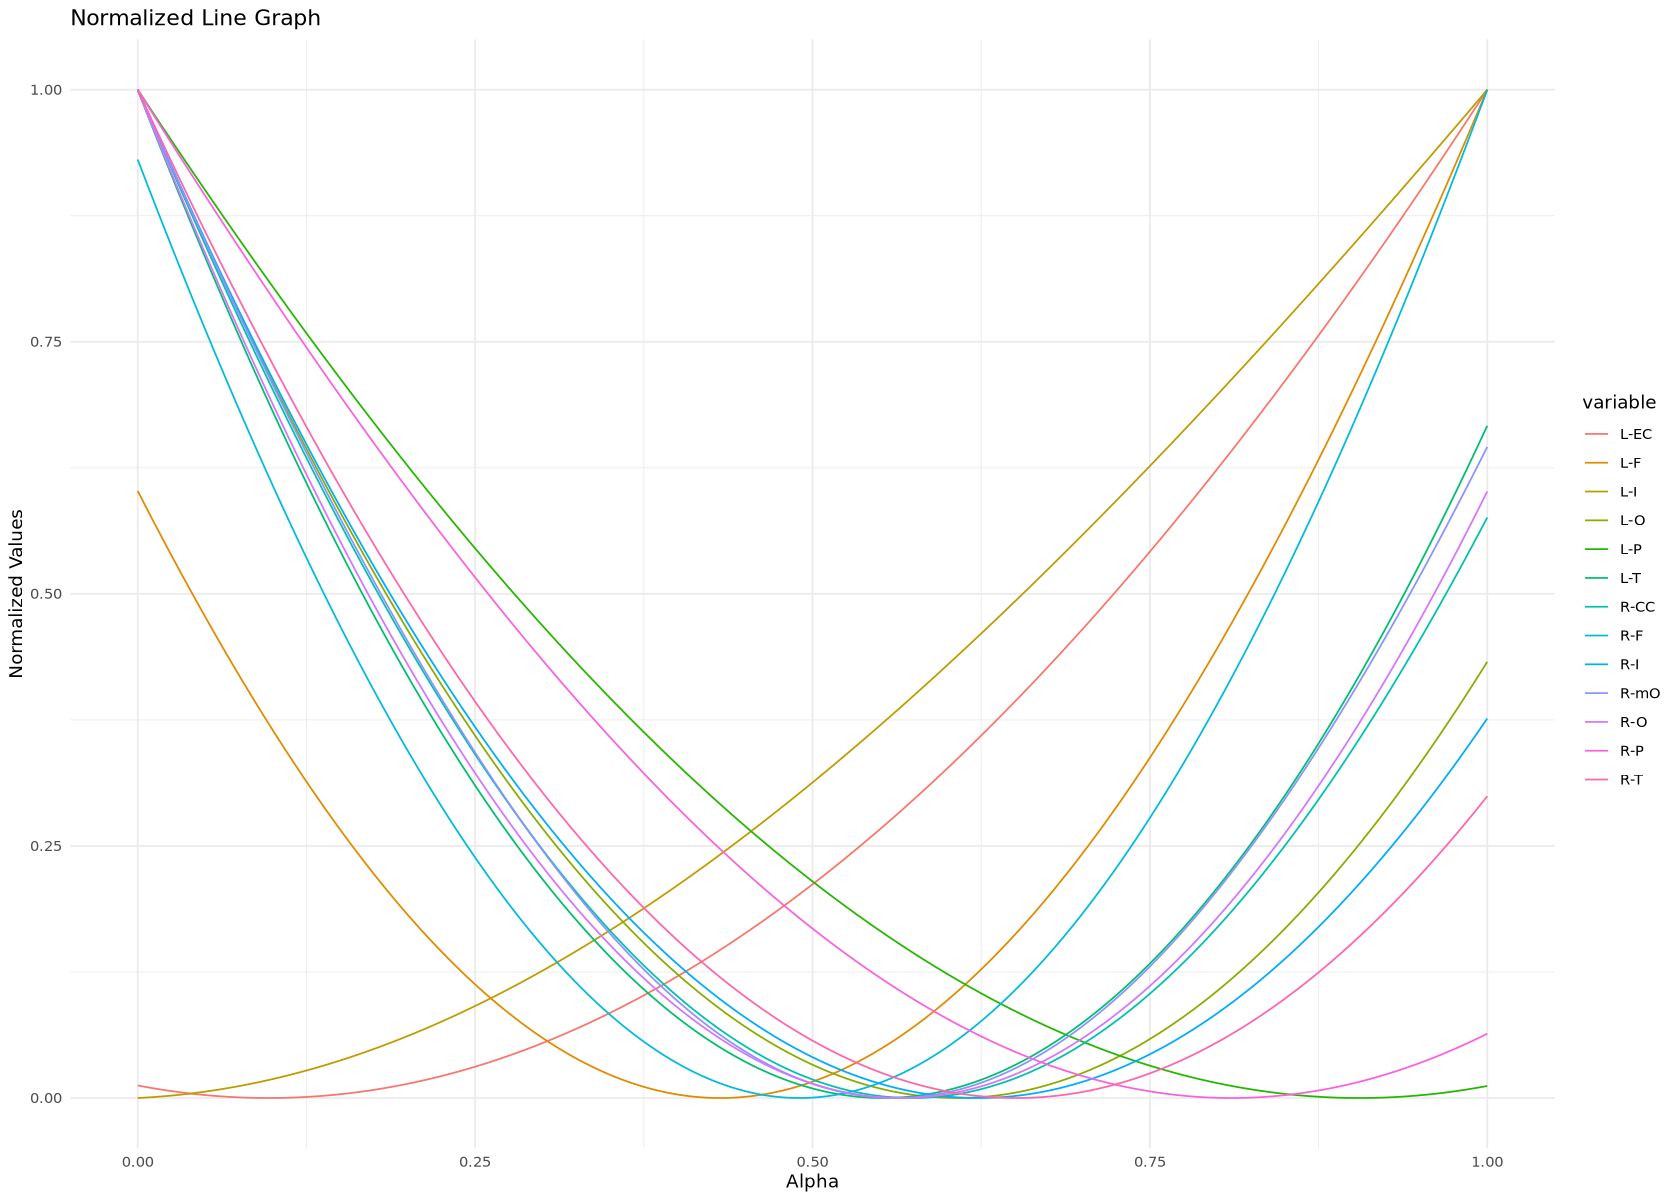

In [71]:
options(repr.plot.width=14, repr.plot.height=10)

ggplot(df1_normalized, aes(x = Alpha, y = value_normalized, color = variable)) +
  geom_line() +
  labs(title = "Normalized Line Graph",
       x = "Alpha",
       y = "Normalized Values") +
  theme_minimal()

In [72]:
write.table(temp3,"beta.txt", sep="\t", row.names=TRUE, col.names=TRUE)

In [19]:
temp3<-read.table("./beta.txt", header=TRUE)

In [20]:
temp4<-read.table("/tscc/projects/ps-gleesonlab8/User/chchung/Interneuron/20230114_7614_Ampliseq_QC/Basic_correlation/beta.txt", header=TRUE)

In [21]:
get_min_index <- function(row) {
  return(which.min(row))
}
# Apply the function to each row
min_indices <- apply(t(cbind(temp3,temp4)), 1, get_min_index)
min_indices<-as.data.frame(min_indices)
min_indices$ID<-rep(c('ID05', 'ID01'), times = c(13, 11))
min_indices$ID2<-rep(c('ID'), times = c(24))

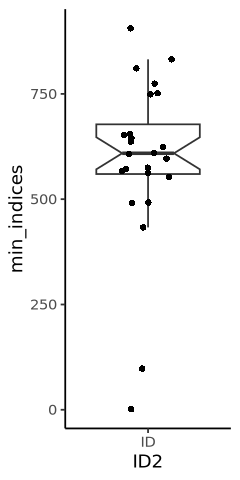

In [22]:
options(repr.plot.width=2, repr.plot.height=4)
p <- ggplot((min_indices), aes(x=ID2, y=min_indices)) + 
geom_boxplot(outlier.shape = NA, notch=TRUE)  +
geom_jitter(shape=16, position=position_jitter(0.2)) + theme_classic()
p

In [23]:
pdf(file="7614_7669_beta.pdf",width=2,height=4)
p
dev.off()

png 
  2

In [24]:
mean(min_indices$min_indices)/10

[1] 59.14167

In [25]:
# Create a vector (replace this with your own data)
my_vector <- min_indices$min_indices

# Calculate mean
mean_value <- mean(my_vector)

# Specify confidence level (e.g., 95%)
confidence_level <- 0.95

# Calculate standard deviation
std_dev <- sd(my_vector)

# Calculate standard error
standard_error <- std_dev / sqrt(length(my_vector))

# Calculate margin of error
margin_of_error <- qnorm((1 + confidence_level) / 2) * standard_error

# Calculate confidence interval
confidence_interval <- c(mean_value - margin_of_error, mean_value + margin_of_error)

# Print the results
cat("95% Confidence Interval:", confidence_interval[1]/10, "to", confidence_interval[2]/10, "\n")


95% Confidence Interval: 51.03665 to 67.24668 


In [26]:
mean(min_indices$min_indices)/10

[1] 59.14167

In [27]:
temp4_colnames <- paste0("ID01_", colnames(temp4))
colnames(temp4) <- temp4_colnames
temp3_colnames <- paste0("ID05_", colnames(temp3))
colnames(temp3) <- temp3_colnames

In [28]:
df<-t(cbind(temp3,temp4))
df1<-cbind(data.frame(Alpha=seq(0, 1, length.out = ncol(df))),t(df))

# Normalize the dataframe values
df1_normalized <- df1 %>%
  gather(key = "variable", value = "value", -Alpha) %>%
  group_by(variable) %>%
  mutate(value_normalized = (value - min(value)) / (max(value) - min(value)))

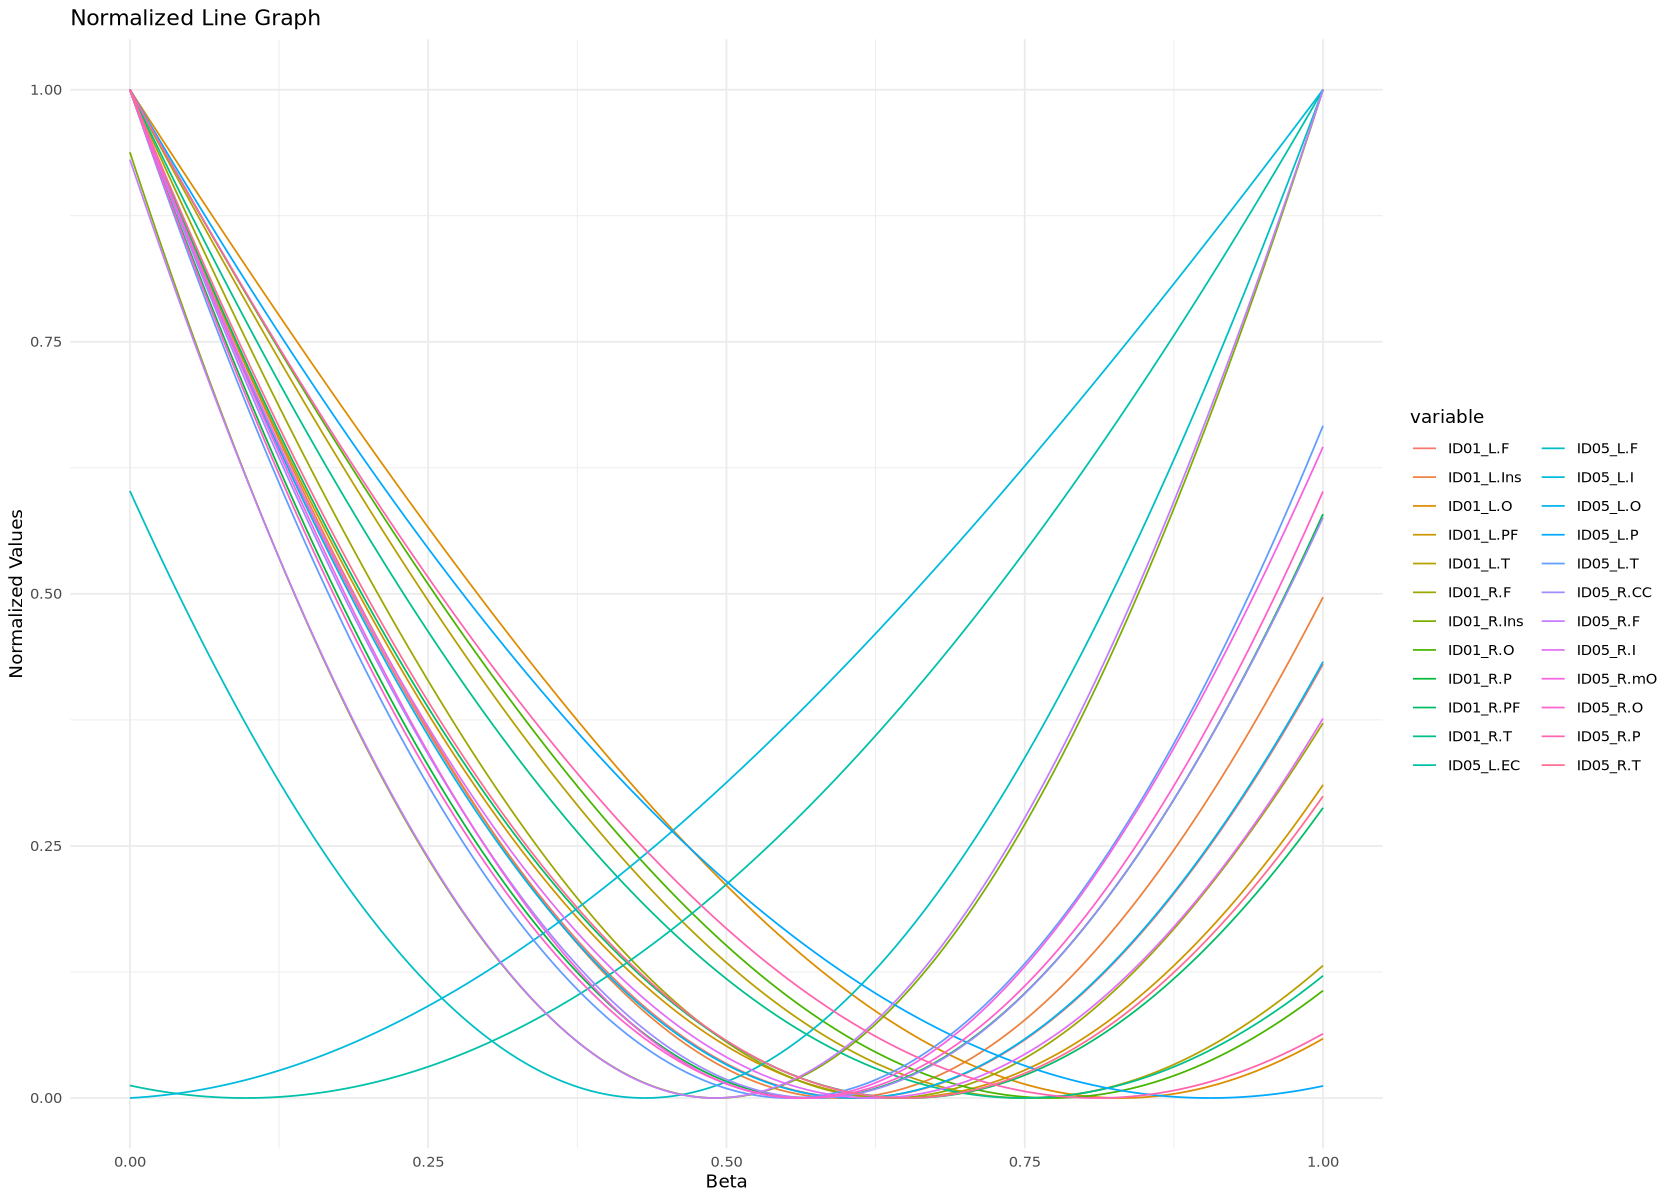

In [29]:
options(repr.plot.width=14, repr.plot.height=10)

ggplot(df1_normalized, aes(x = Alpha, y = value_normalized, color = variable)) +
  geom_line() +
  labs(title = "Normalized Line Graph",
       x = "Beta",
       y = "Normalized Values") +
  theme_minimal()

In [30]:
write.table(min_indices,"7614_7669_beta.txt", sep="\t", row.names=TRUE, col.names=TRUE)